In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyupbit
from sklearn import preprocessing

In [2]:
ticker = 'KRW-BTC'
interval = 'day'
to = '2022-01-19'
count = 365
bitcoin = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to, count=count))
pd.options.display.float_format = '{:.2f}'.format

In [3]:
bitcoin.reset_index(inplace=True)
bitcoin = bitcoin.rename(columns={'index':'date'})
bitcoin= bitcoin.drop_duplicates(['date'])
bitcoin = bitcoin.astype({'open': int, 'high': int, 'low': int, 'close':int})
bitcoin

,date,open,high,low,close,volume,value
0,2021-07-03 09:00:00,39440000,40578000,38951000,40299000,4933.23,196728282036.98
1,2021-07-04 09:00:00,40299000,41643000,40088000,40948000,4981.52,204137532775.45
2,2021-07-05 09:00:00,40915000,40948000,38957000,39506000,8680.72,345601003050.72
3,2021-07-06 09:00:00,39509000,40650000,39340000,39814000,6292.90,250893123484.22
4,2021-07-07 09:00:00,39814000,40727000,39637000,39743000,5761.29,231746067905.13
...,...,...,...,...,...,...,...
195,2022-01-14 09:00:00,51885000,52691000,51010000,52230000,5030.19,261086090962.35
196,2022-01-15 09:00:00,52230000,52891000,51878000,52357000,2595.05,135657742666.71
197,2022-01-16 09:00:00,52357000,52634000,51948000,52165000,2131.43,111417440453.13
198,2022-01-17 09:00:00,52165000,52300000,50822000,51436000,3104.24,160683769882.98


In [4]:
bitcoin = bitcoin.drop(["open","high","low", "volume", "value"], axis=1)
bitcoin

,date,close
0,2021-07-03 09:00:00,40299000
1,2021-07-04 09:00:00,40948000
2,2021-07-05 09:00:00,39506000
3,2021-07-06 09:00:00,39814000
4,2021-07-07 09:00:00,39743000
...,...,...
195,2022-01-14 09:00:00,52230000
196,2022-01-15 09:00:00,52357000
197,2022-01-16 09:00:00,52165000
198,2022-01-17 09:00:00,51436000


In [38]:
#"KRW-ETH", "KRW-NU", "KRW-ALGO", "KRW-NEAR"
ticker = "KRW-ALGO"
interval = 'day'
to = '2022-01-19'
algo = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to))
pd.options.display.float_format = '{:.2f}'.format
algo.reset_index(inplace=True)
algo = algo.rename(columns={'index':'date'})
algo= algo.drop_duplicates(['date'])
algo = algo.astype({'open': int, 'high': int, 'low': int, 'close':int})
algo

,date,open,high,low,close,volume,value
0,2021-11-18 09:00:00,6500,12390,2185,2300,429629293.18,1481658713780.10
1,2021-11-19 09:00:00,2300,2410,2155,2325,76227621.46,173572110263.32
2,2021-11-20 09:00:00,2325,2355,2195,2270,34691610.43,78849413287.69
3,2021-11-21 09:00:00,2270,2330,2210,2280,22844716.10,51823995691.65
4,2021-11-22 09:00:00,2275,2285,2165,2180,18026110.17,39732825971.93
...,...,...,...,...,...,...,...
57,2022-01-14 09:00:00,1660,1710,1615,1680,15761796.74,26305651222.58
58,2022-01-15 09:00:00,1680,1710,1650,1675,7219604.98,12119850243.95
59,2022-01-16 09:00:00,1675,1750,1660,1725,10066699.05,17113815859.88
60,2022-01-17 09:00:00,1725,1745,1635,1640,13307706.50,22456967574.52


In [39]:
algo = algo.drop(["open","high","low", "volume", "value"], axis=1)

In [52]:
algo

,date,close
0,2021-11-18 09:00:00,2300
1,2021-11-19 09:00:00,2325
2,2021-11-20 09:00:00,2270
3,2021-11-21 09:00:00,2280
4,2021-11-22 09:00:00,2180
...,...,...
57,2022-01-14 09:00:00,1680
58,2022-01-15 09:00:00,1675
59,2022-01-16 09:00:00,1725
60,2022-01-17 09:00:00,1640


In [53]:
algo=algo.set_index('date')
algo

,close
date,
2021-11-18 09:00:00,2300
2021-11-19 09:00:00,2325
2021-11-20 09:00:00,2270
2021-11-21 09:00:00,2280
2021-11-22 09:00:00,2180
...,...
2022-01-14 09:00:00,1680
2022-01-15 09:00:00,1675
2022-01-16 09:00:00,1725


In [57]:
algo_dsr = algo.pct_change(1)

In [58]:
algo_dsr.std()

close   0.05
dtype: float64

In [63]:
algo_dcsr = (algo_dsr+1).cumprod()-1

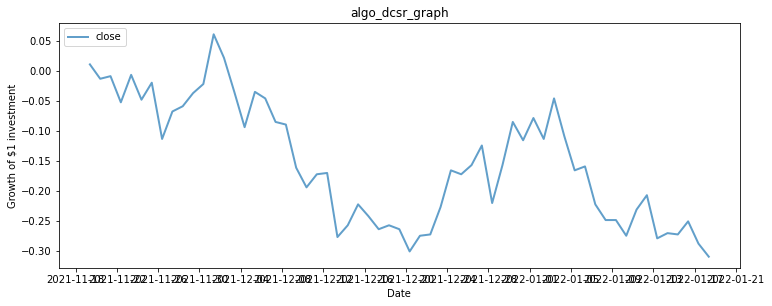

In [64]:
from matplotlib import dates
algo_dcsr_graph = algo_dcsr
plt.figure(figsize=(12.2, 4.5))
for c in algo_dcsr_graph.columns.values:
    plt.plot(algo_dcsr_graph[c], alpha=.7, lw=2)
plt.title("algo_dcsr_graph")
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.legend(algo_dcsr_graph.columns.values, loc='upper left')
ax = plt.gca()
ax.xaxis.set_major_locator(dates.DayLocator(interval=4))
plt.show()

In [40]:
coins = pd.merge(bitcoin, algo, how='outer', on='date')
coins

,date,close_x,close_y
0,2021-07-03 09:00:00,40299000,NaN
1,2021-07-04 09:00:00,40948000,NaN
2,2021-07-05 09:00:00,39506000,NaN
3,2021-07-06 09:00:00,39814000,NaN
4,2021-07-07 09:00:00,39743000,NaN
...,...,...,...
195,2022-01-14 09:00:00,52230000,1680.00
196,2022-01-15 09:00:00,52357000,1675.00
197,2022-01-16 09:00:00,52165000,1725.00
198,2022-01-17 09:00:00,51436000,1640.00


In [41]:
coins.columns=['date', 'BTC', 'ALGO']
coins=coins.set_index('date')
coins

,BTC,ALGO
date,,
2021-07-03 09:00:00,40299000,NaN
2021-07-04 09:00:00,40948000,NaN
2021-07-05 09:00:00,39506000,NaN
2021-07-06 09:00:00,39814000,NaN
2021-07-07 09:00:00,39743000,NaN
...,...,...
2022-01-14 09:00:00,52230000,1680.00
2022-01-15 09:00:00,52357000,1675.00
2022-01-16 09:00:00,52165000,1725.00


In [42]:
from datetime import datetime,date
coins.index = pd.DatetimeIndex(coins.index).normalize()

In [43]:
coins.describe()

,BTC,ALGO
count,200.00,62.00
mean,58755835.00,1957.34
std,11512799.98,234.10
min,35305000.00,1590.00
25%,52173250.00,1730.00
50%,57590000.00,1932.50
75%,69801500.00,2176.25
max,81403000.00,2440.00


In [59]:
coins_dcsr = (coins_dsr+1).cumprod()

In [44]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(coins)

coins_scaled = pd.DataFrame(scaled, columns = coins.columns)
coins_scaled = coins_scaled.set_index(pd.DatetimeIndex(coins.index))
coins_scaled

,BTC,ALGO
date,,
2021-07-03,10.83,NaN
2021-07-04,12.24,NaN
2021-07-05,9.11,NaN
2021-07-06,9.78,NaN
2021-07-07,9.63,NaN
...,...,...
2022-01-14,36.72,10.59
2022-01-15,36.99,10.00
2022-01-16,36.57,15.88


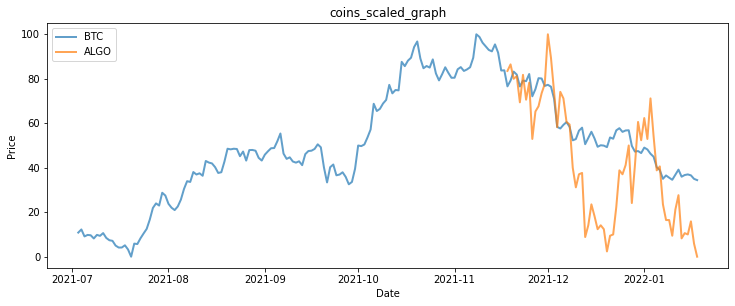

In [45]:
coins_scaled_graph = coins_scaled
plt.figure(figsize=(12.2, 4.5))
for c in coins_scaled_graph.columns.values:
    plt.plot(coins_scaled_graph[c], alpha=.7, lw=2)
plt.title("coins_scaled_graph")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(coins_scaled_graph.columns.values, loc='upper left')
plt.show()

In [46]:
coins_dsr = coins.pct_change(1)

In [47]:
coins_dsr.std()

BTC    0.03
ALGO   0.05
dtype: float64

In [48]:
coins_dsr.corr()

,BTC,ALGO
BTC,1.00,0.65
ALGO,0.65,1.00


In [49]:
coins_dcsr = (coins_dsr+1).cumprod()

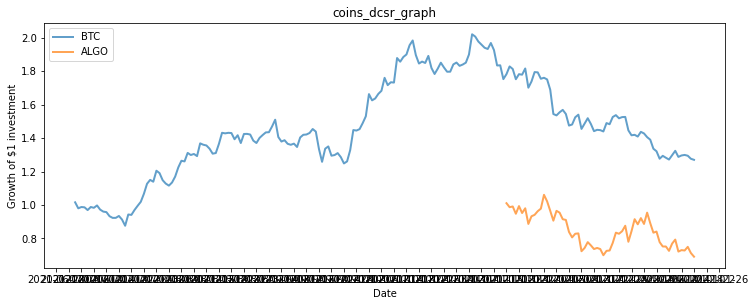

In [51]:
from matplotlib import dates
coins_dcsr_graph = coins_dcsr
plt.figure(figsize=(12.2, 4.5))
for c in coins_dcsr_graph.columns.values:
    plt.plot(coins_dcsr_graph[c], alpha=.7, lw=2)
plt.title("coins_dcsr_graph")
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.legend(coins_dcsr_graph.columns.values, loc='upper left')
ax = plt.gca()
ax.xaxis.set_major_locator(dates.DayLocator(interval=4))
plt.show()